(240, 240, 155)


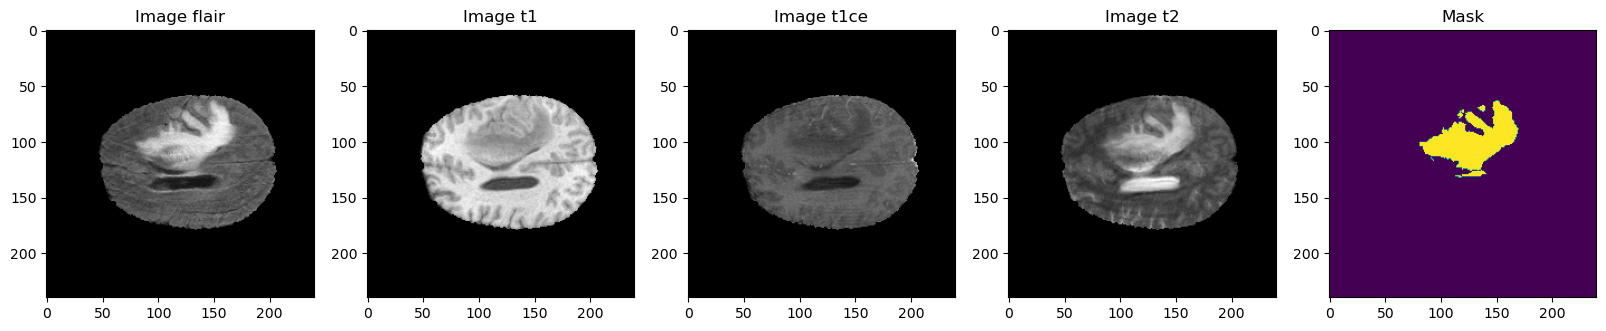

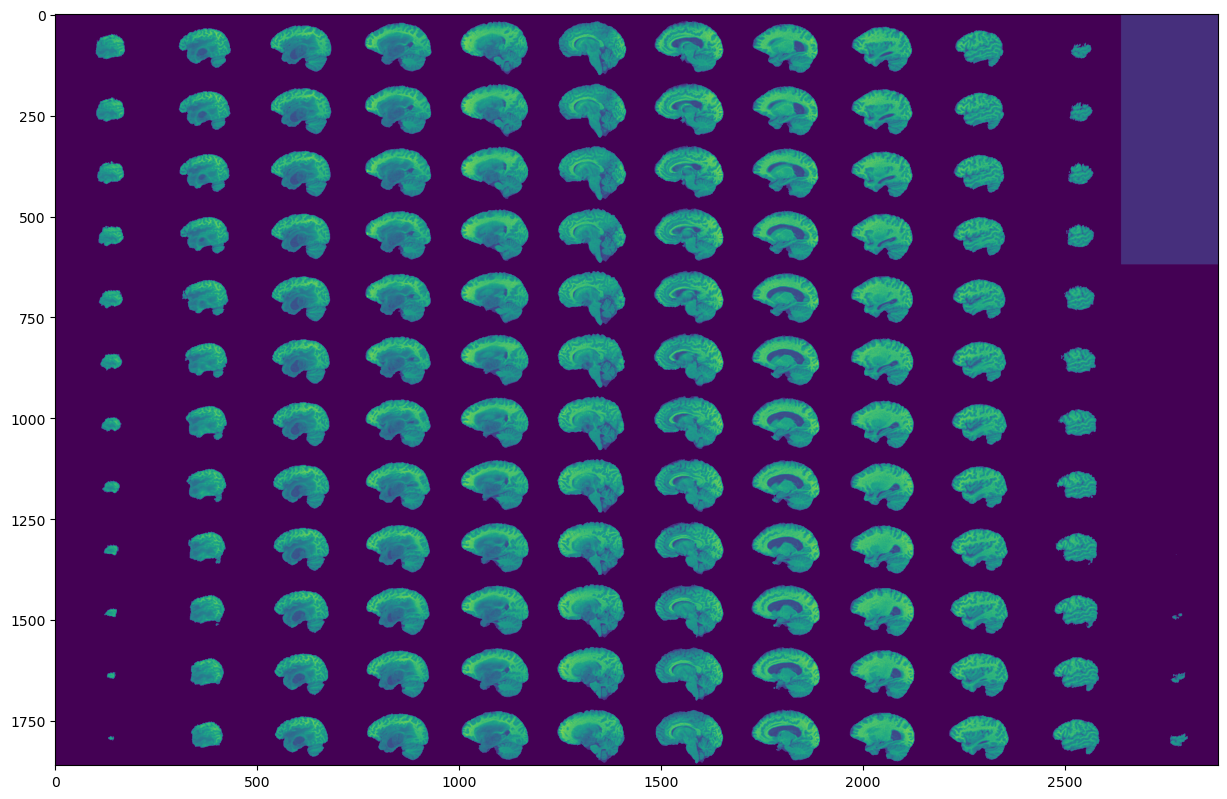

In [3]:
# BRAIN TUMOR SEGMENTATION - MAIN SCRIPT

# IMPORTS
import numpy as np
import nibabel as nib
import h5py
import matplotlib.pyplot as plt
from skimage.transform import rotate
from skimage.util import montage
import os
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
#from classifier import *



# SET DIRECTORIES
HOME_DIR = 'C:/Users/kajin/Documents/_/3/ZMO/sm/archiven/'
#'C:/Users/kajin/Documents/_/3/ZMO/sm/archive/BraTS2020_training_data/content/input/'
DATA_DIR = HOME_DIR

TRAIN_DIR = DATA_DIR+'BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/'
VALID_DIR = DATA_DIR+'BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData/'

# LOAD DATA

test_img_flair = nib.load(TRAIN_DIR+'BraTS20_Training_001/BraTS20_Training_001_flair.nii').get_fdata()
test_img_t1 = nib.load(TRAIN_DIR+'BraTS20_Training_001/BraTS20_Training_001_t1.nii').get_fdata()
test_img_t1ce = nib.load(TRAIN_DIR+'BraTS20_Training_001/BraTS20_Training_001_t1ce.nii').get_fdata()
test_img_t2 = nib.load(TRAIN_DIR+'BraTS20_Training_001/BraTS20_Training_001_t2.nii').get_fdata()
test_mask = nib.load(TRAIN_DIR+'BraTS20_Training_001/BraTS20_Training_001_seg.nii').get_fdata()


fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize = (20, 10))
slice_w = 25
ax1.imshow(test_img_flair[:,:,test_img_flair.shape[0]//2-slice_w], cmap = 'gray')
ax1.set_title('Image flair')
ax2.imshow(test_img_t1[:,:,test_img_t1.shape[0]//2-slice_w], cmap = 'gray')
ax2.set_title('Image t1')
ax3.imshow(test_img_t1ce[:,:,test_img_t1ce.shape[0]//2-slice_w], cmap = 'gray')
ax3.set_title('Image t1ce')
ax4.imshow(test_img_t2[:,:,test_img_t2.shape[0]//2-slice_w], cmap = 'gray')
ax4.set_title('Image t2')
ax5.imshow(test_mask[:,:,test_mask.shape[0]//2-slice_w])
ax5.set_title('Mask')

print(np.shape(test_mask))

fig, ax1 = plt.subplots(1, 1, figsize = (15,15))
ax1.imshow(rotate(montage(test_img_t1[50:-50,:,:]), 90, resize=True))

ax4.imshow(test_img_t2[:,:,95],cmap='gray')

In [2]:
def LoadData(path):
    masks = np.zeros([240, 240, 155, 1])
    images = np.zeros([240, 240, 155, 1]) # 370
    count = 0
    for (dirpath, dirnames, filenames) in os.walk(path):
        # print(dirpath)
        # print(dirnames)
        # print(filenames)
        for dir in dirnames:
            for file in os.listdir(dirpath + dir):
                # print(file)
                if file.endswith('t2.nii'):
                    img = nib.load(dirpath + dir + '/' + file).get_fdata()
                    images[:, :, :, count] = img[:, :, :]
                elif file.endswith('seg.nii'):
                    msk = nib.load(dirpath + dir + '/' + file).get_fdata()
                    masks[:, :, :, count] = msk[:, :, :]
            
            # np.save(dirpath + dir + '/' + dir + '_' + 'features', [means[i], stds[i]])
            
            count += 1
            break # TODO
        if count > 0: break # TODO
    return images, masks

In [3]:
img, msk = LoadData(TRAIN_DIR)

print(np.shape(img))
print(np.shape(msk))
print(img.dtype)

(240, 240, 155, 1)
(240, 240, 155, 1)
float64


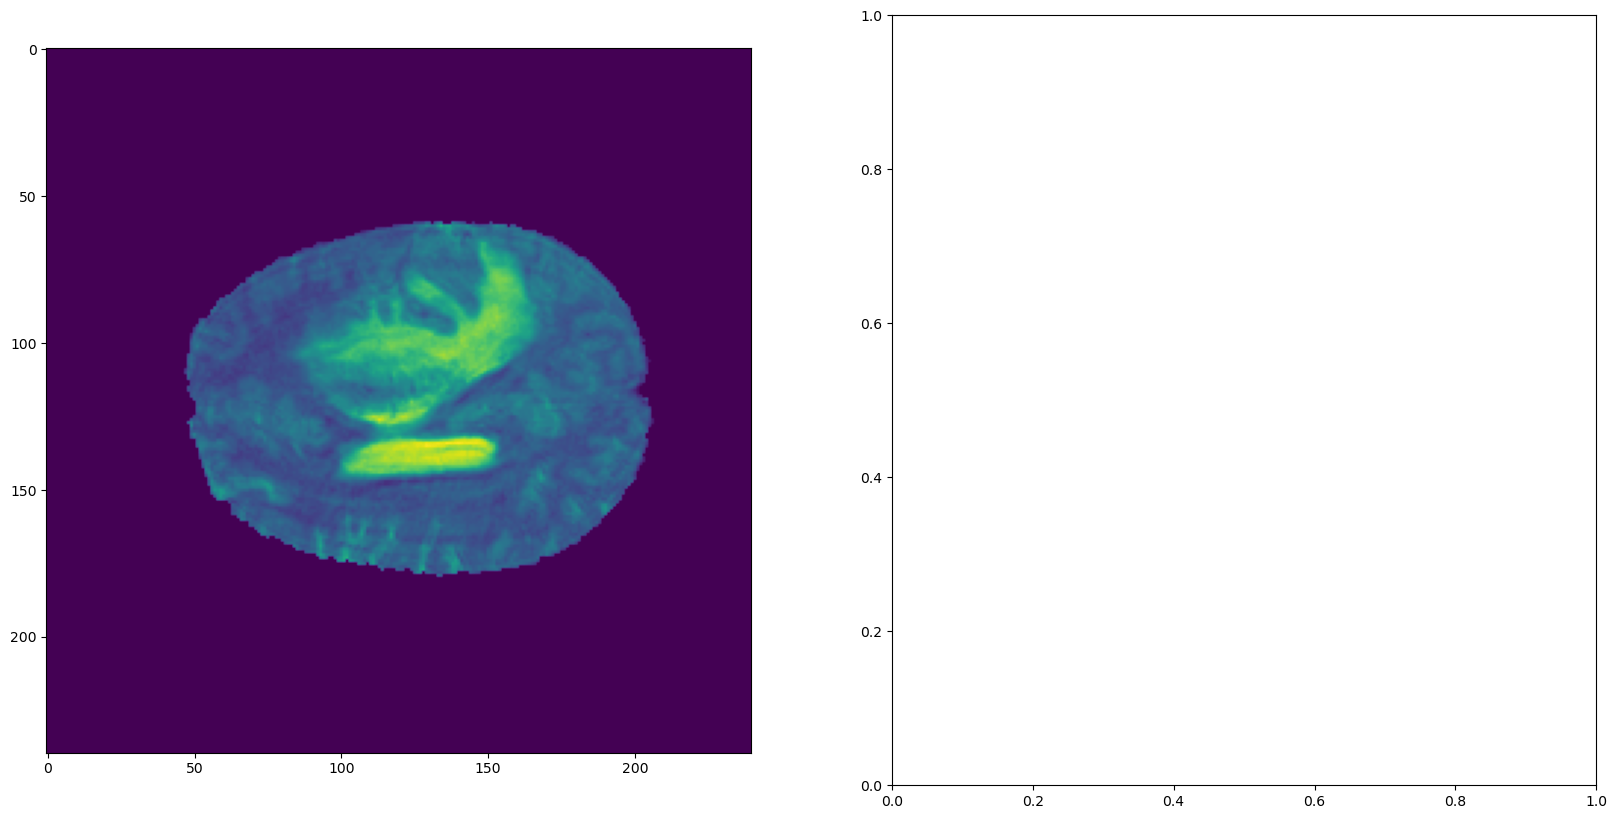

In [4]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20, 10))
ax1.imshow(img[:,:,95,0])
# ax2.imshow(img[:,:,2], cmap='gray')

In [13]:
def SLIC(image, numSegments):
    #image = np.stack([image,image,image],axis=2)
    
    segments = slic(image, numSegments, compactness=0.2, channel_axis=None, enforce_connectivity = True)
    img = image[:,:,95]
    print(np.shape(segments))
    print(np.shape(img))
    marked = mark_boundaries(img, segments[:,:,95]) #image[:,:,0]
    
    segments -= 1
    return segments, marked

In [2]:
NUM_SEGMENTS = 500

In [15]:
superpixels, overlay = SLIC(img[:,:,:,0], NUM_SEGMENTS)

(240, 240, 155)
(240, 240)


(240, 240, 155)
(240, 240, 3)


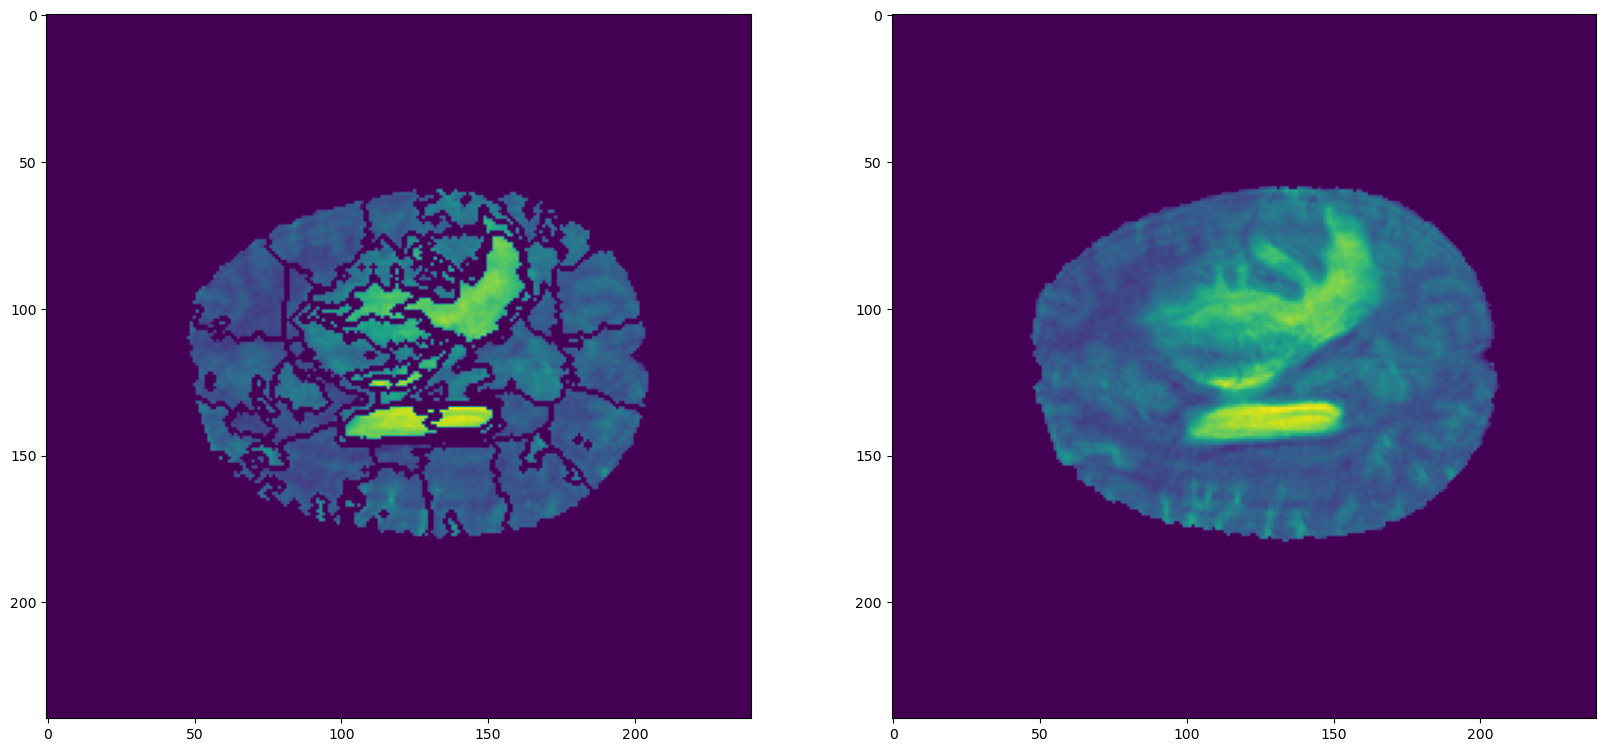

In [12]:
# print(img[:,:,1])
print(np.shape(superpixels))
# print(superpixels)
print(np.shape(overlay))
# print(overlay)


fig, (ax1, ax2) = plt.subplots(1,2,figsize = (20, 10))
#ax1.imshow(superpixels)
ax1.imshow(overlay[:,:,0]) #result of overlay > 240,240,3; in the third dim it is always the same, i dont know, what it is
ax2.imshow(img[:,:,95,0])

In [257]:
intensities = [[] for _ in range(NUM_SEGMENTS)]
for (x,y,z), label in np.ndenumerate(superpixels):
    intensities[label].append(img[x,y,z,0])
intensities = [np.array(ints) for ints in intensities]
print(intensities)

[array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([ 0.,  0.,  0., ...,  0., 44.,  0.]), array([  0.,   0.,   0., ..., 147., 144., 138.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([ 0.,  0.,  0., ..., 22., 34., 32.]), array([0., 0., 0., ..., 0

In [231]:
means = [np.mean(ints) if ints.size > 0 else None for ints in intensities]
stds = [np.std(ints) if ints.size > 0 else None for ints in intensities]

In [261]:
tumor_pixels = np.zeros((NUM_SEGMENTS, 2))
for (x,y,z), label in np.ndenumerate(superpixels):
    if msk[x,y,z,0] > 0.:
        tumor_pixels[label,0] += 1
    else:
        tumor_pixels[label,1] += 1


(150, 2)
211979.0
(150, 1)
22.0


In [242]:
low, mid, high = [], [], []

for i in range(NUM_SEGMENTS):
    ratio = tumor_pixels[i,0] / np.sum(tumor_pixels[i,:])
    if ratio > 0.9:
        high.append(i)
    elif ratio < 0.1:
        low.append(i)
    else:
        mid.append(i)
        
print(len(low), len(mid), len(high))

138 11 1


C:\Users\kajin\AppData\Local\Temp\ipykernel_21232\1182695391.py:4: RuntimeWarning: invalid value encountered in scalar divide
  ratio = tumor_pixels[i,0] / np.sum(tumor_pixels[i,:])


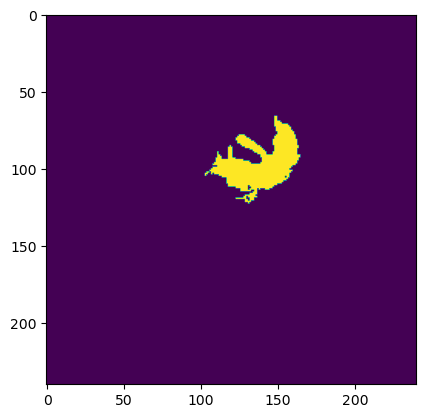

In [245]:
im = np.zeros_like(img[:,:,:,0])
im[superpixels == high[0]] = 1.

plt.imshow(im[:,:,95])

In [253]:

a = np.array([1,2,3])
np.save("aaaaaaaa.npy", a)


In [254]:
b = np.load("aaaaaaaa.npy", allow_pickle=True)

In [21]:
RESULTS_TRAIN_DIR = DATA_DIR+'Results/Results_Training/'
features = get_features(RESULTS_TRAIN_DIR, NUM_SEGMENTS)

In [18]:
print(np.shape(features))
print(features[1, 135, :])

(369, 500, 3)
[0. 0. 0.]


# Test features on 1 image

In [58]:
DATA_DIR = 'C:/Users/kajin/Documents/_/3/ZMO/sm/archiven/'
TRAIN_DIR = DATA_DIR+'BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/'
VALID_DIR = DATA_DIR+'BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData/'
RESULTS_TRAIN_DIR = DATA_DIR+'Results/Results_Training/'
RESULTS_VALID_DIR = DATA_DIR+'Results/Results_Validation/'

In [2]:
from preprocessing import *

num_segments=500

img, mask = load_data(TRAIN_DIR, "BraTS20_Training_001")
segments, _ = slic_(img, num_segments, slice_n=0)
intensities = intensities_in_superpixels(img, num_segments, segments)
means, stds = descriptors(intensities)
tumor_pixels = count_tumor(segments, mask, num_segments)
labels = tumor_labeling(tumor_pixels, num_segments)



In [56]:
hist = np.histogram(np.array(intensities[1]))
print(len(intensities))
print(len(hist))

10000
2


(array([ 244., 1590., 3711., 3979., 3394., 2132.,  909.,  239.,   25.,
          10.]),
 array([101. , 118.5, 136. , 153.5, 171. , 188.5, 206. , 223.5, 241. ,
        258.5, 276. ]),
 <BarContainer object of 10 artists>)

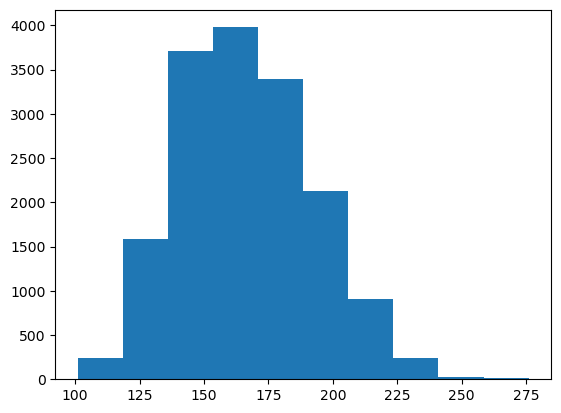

In [44]:
fig, (ax1) = plt.subplots(1,1)
ax1.hist(intensities[240])

In [12]:
pos = np.where(labels == 1)[0]
neg = np.where(labels == 0)[0]

ints = [np.array(i) for i in intensities]

pos_ints = np.concatenate([ints[i] for i in pos])
neg_ints = np.concatenate([ints[i] for i in neg])

(array([6.0300e+02, 6.9010e+03, 1.8627e+04, 3.2339e+04, 3.1361e+04,
        1.5764e+04, 5.9830e+03, 8.3000e+02, 2.4900e+02, 3.1000e+01]),
 array([ 82. , 108.6, 135.2, 161.8, 188.4, 215. , 241.6, 268.2, 294.8,
        321.4, 348. ]),
 <BarContainer object of 10 artists>)

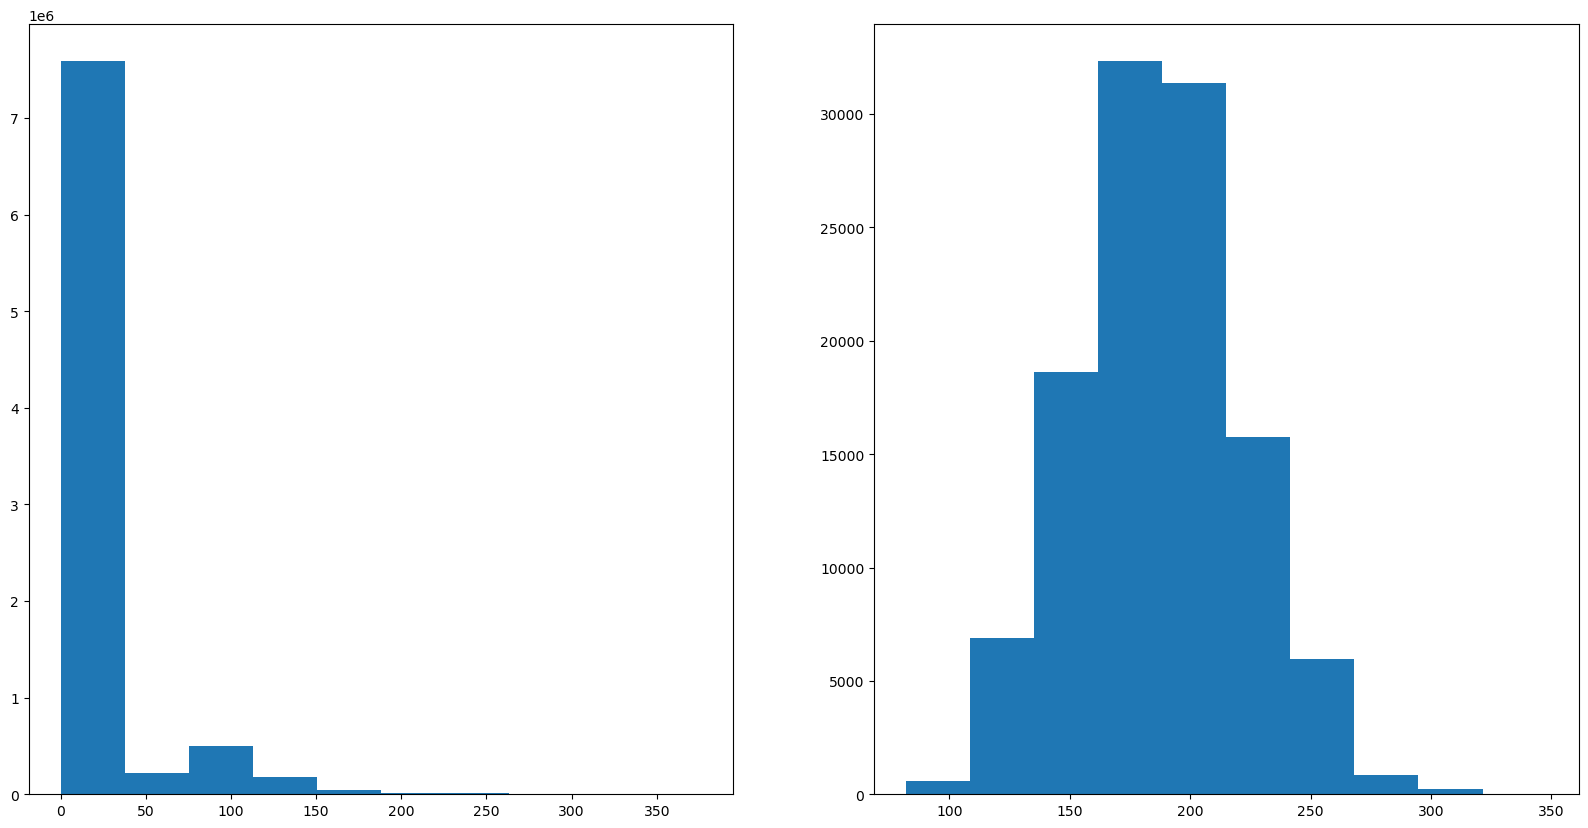

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20, 10))
ax1.hist(neg_ints)
ax2.hist(pos_ints)

In [14]:
# vyradit pixely s intensitou 0 (pozadi)
pos_ints = pos_ints[pos_ints > 0.]
neg_ints = neg_ints[neg_ints > 0.]

(array([6.0300e+02, 6.9010e+03, 1.8627e+04, 3.2339e+04, 3.1361e+04,
        1.5764e+04, 5.9830e+03, 8.3000e+02, 2.4900e+02, 3.1000e+01]),
 array([ 82. , 108.6, 135.2, 161.8, 188.4, 215. , 241.6, 268.2, 294.8,
        321.4, 348. ]),
 <BarContainer object of 10 artists>)

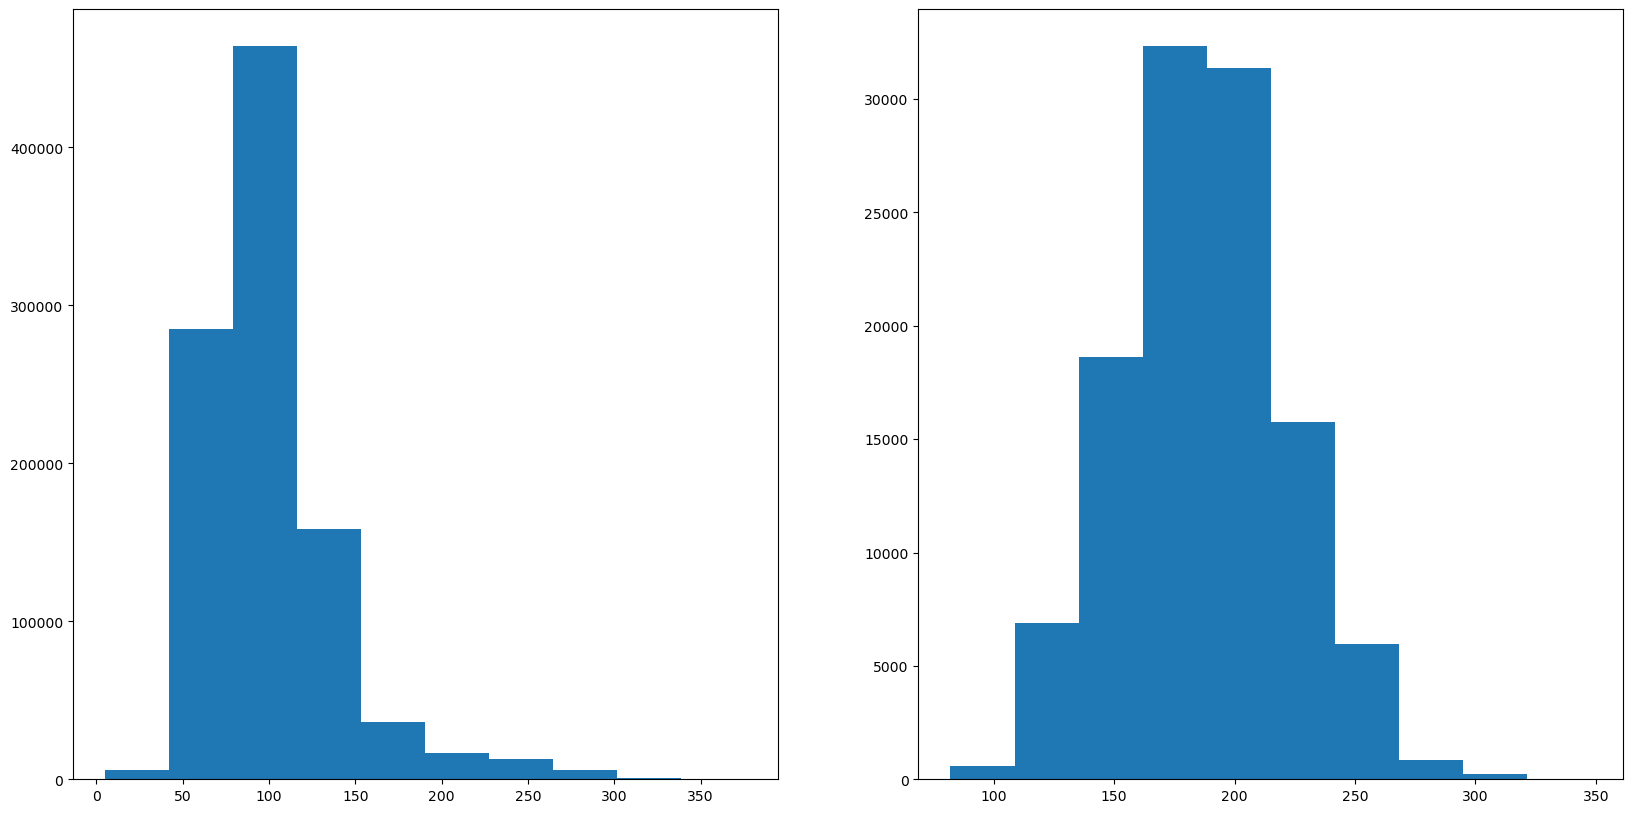

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20, 10))
ax1.hist(neg_ints)
ax2.hist(pos_ints)

In [16]:
pos_means = np.array([means[i] for i in pos])
neg_means = np.array([means[i] for i in neg])
pos_stds = np.array([stds[i] for i in pos])
neg_stds = np.array([stds[i] for i in neg])

# vyradit pixely s intensitou 0 (pozadi)
mean_threshold = 1.
std_threshold = 5.
pos_means = pos_means[pos_means > mean_threshold]
neg_means = neg_means[neg_means > mean_threshold]
pos_stds = pos_stds[pos_stds > std_threshold]
neg_stds = neg_stds[neg_stds > std_threshold]

(array([3., 0., 0., 0., 2., 0., 0., 0., 0., 1.]),
 array([162.99825763, 169.11943861, 175.24061959, 181.36180057,
        187.48298155, 193.60416253, 199.72534352, 205.8465245 ,
        211.96770548, 218.08888646, 224.21006744]),
 <BarContainer object of 10 artists>)

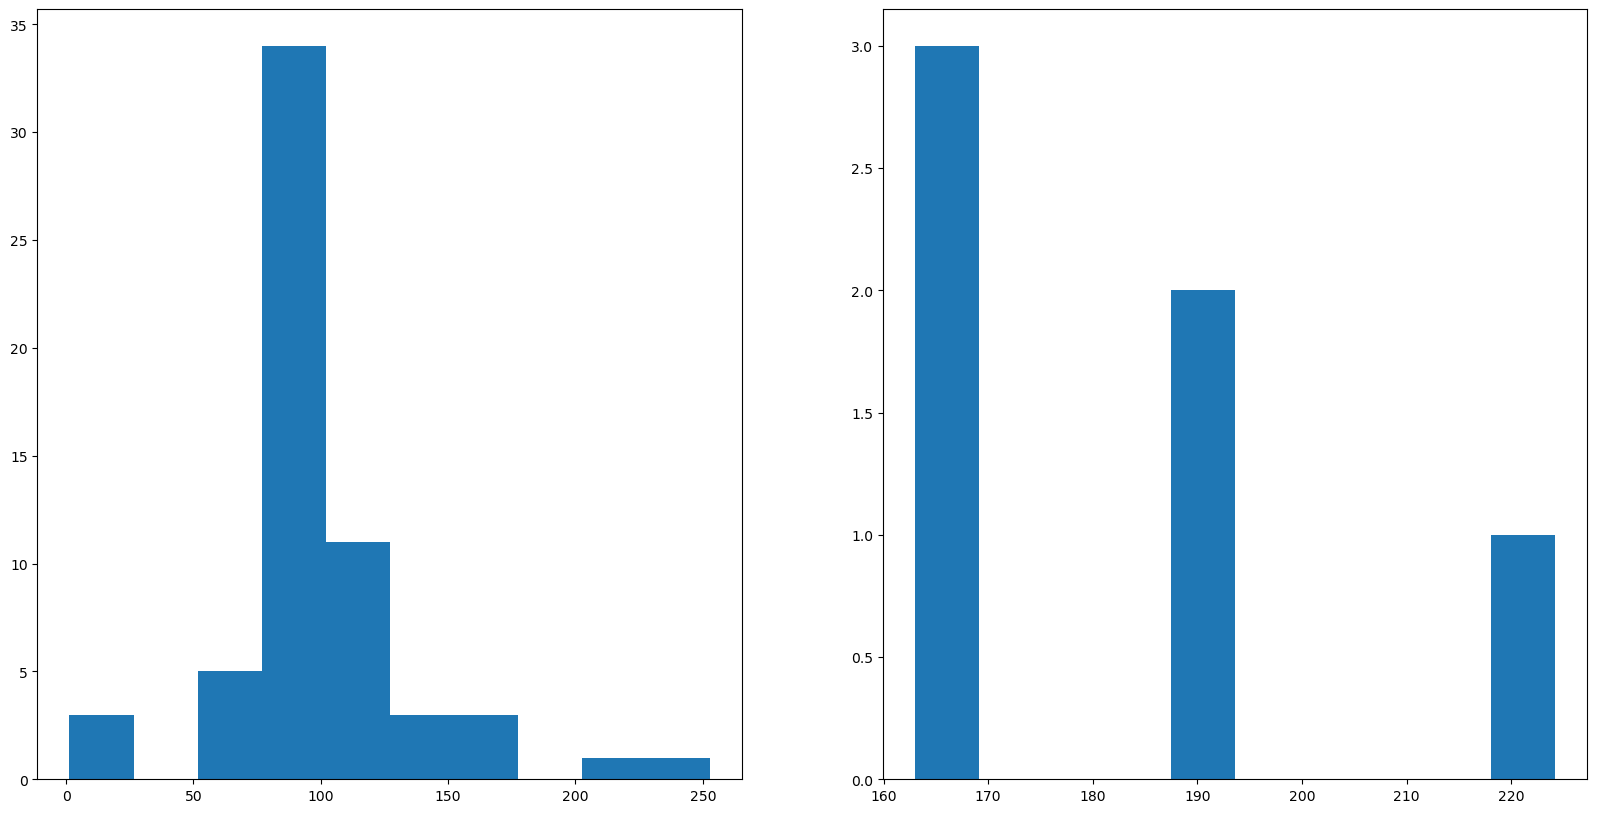

In [17]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20, 10))
ax1.hist(neg_means)
ax2.hist(pos_means)

(array([1., 0., 0., 1., 0., 0., 1., 2., 0., 1.]),
 array([20.80111143, 21.40805401, 22.01499659, 22.62193918, 23.22888176,
        23.83582434, 24.44276692, 25.0497095 , 25.65665208, 26.26359467,
        26.87053725]),
 <BarContainer object of 10 artists>)

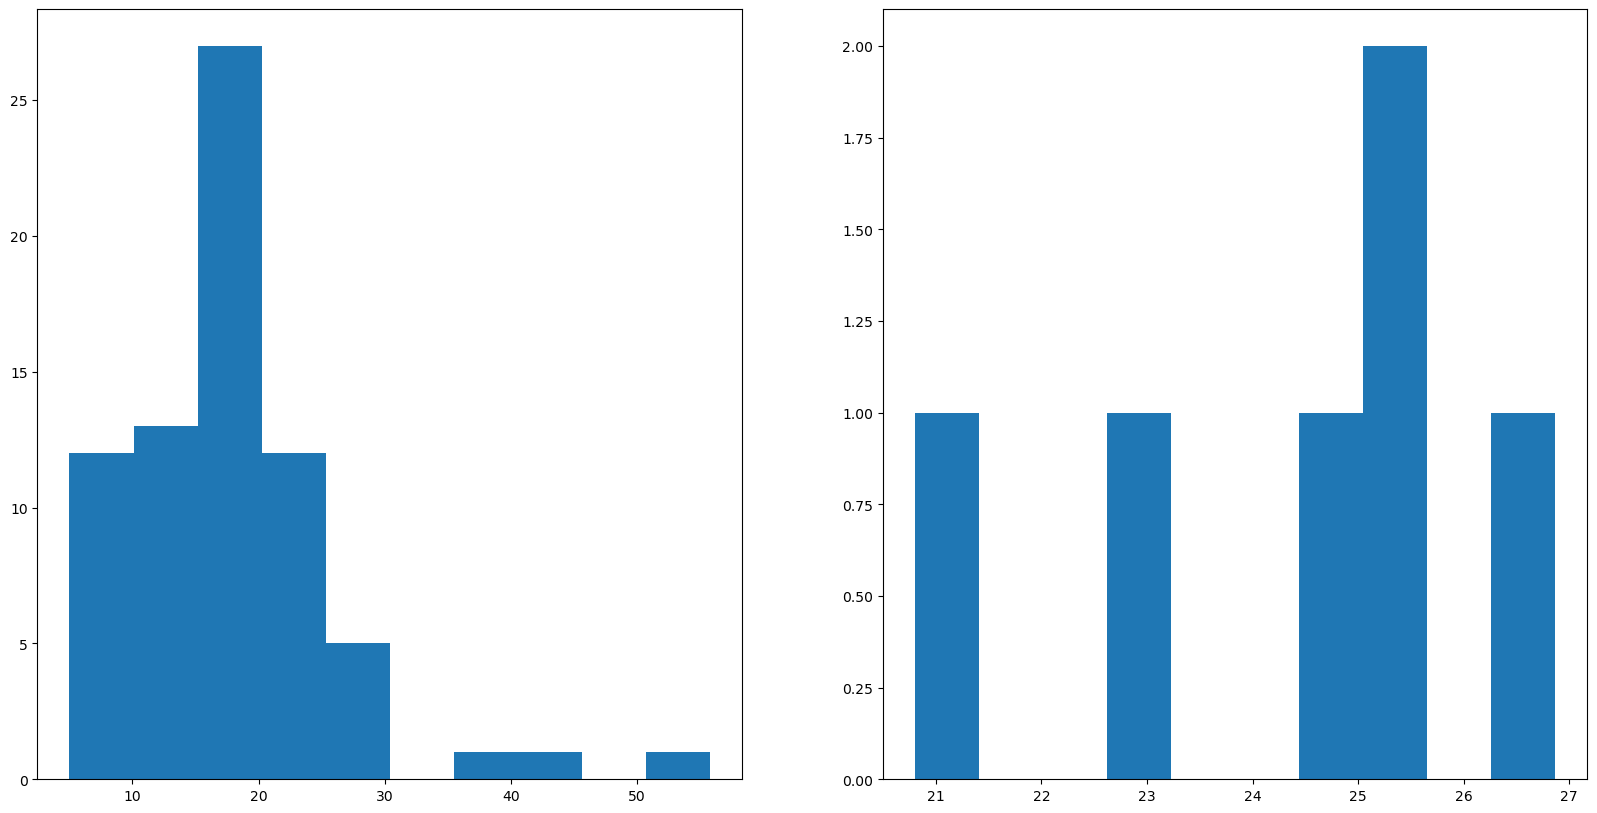

In [18]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20, 10))
ax1.hist(neg_stds)
ax2.hist(pos_stds)

# Test features on multiple images

In [3]:
from preprocessing import *
import matplotlib.pyplot as plt

In [19]:


DATA_DIR = 'C:/Users/kajin/Documents/_/3/ZMO/sm/archiven/'
TRAIN_DIR = DATA_DIR+'BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/'
VALID_DIR = DATA_DIR+'BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData/'
RESULTS_TRAIN_DIR = DATA_DIR+'Results/Results_Training/'
RESULTS_VALID_DIR = DATA_DIR+'Results/Results_Validation/'

IMAGE_COUNT = 5
NUM_SEGMENTS=500
VERSION = 'a'

def descriptors(intensities, nbins = 10, range=(0, 1200)):
    """
    calculates mean, std and histogram of intensities in every superpixel

    :param intensities ... list of arrays, each array contains intensity values of each pixel that corresponds to
                            one superpixel
    :param nbins ... number of bins of histogram
    :param range ... range of the histogram

    :return: means, stds, histogram
    """

    # if empty array, None ! do not skip (indexing)
    means = [np.mean(ints) if ints.size > 0 else None for ints in intensities]
    stds = [np.std(ints) if ints.size > 0 else None for ints in intensities]

    histograms = np.zeros((nbins, len(intensities)))
    edges = 0
    i = 0
    for ints in intensities:
        if ints.size > 0:
            histograms[:,i], edges = np.histogram(np.array(ints), bins=nbins, range=range)
        else:
            histograms[:,i] = None
        i += 1

    return means, stds, histograms, edges


intensities = []
means = []
stds = []
labels = []
histograms = []

count = 0
for (dirpath, dirnames, filenames) in os.walk(TRAIN_DIR):
    for dir in dirnames:

        ### LOAD DATA ###
        img_, mask_ = load_data(dirpath, dir)

        ### SLIC SUPERPIXELS ###
        # superpixels_, _ = slic_(img_[:, :, :], NUM_SEGMENTS, 0)

        ### LOAD PRECOMPUTED RESULTS ###
        superpixels_ = np.load(RESULTS_TRAIN_DIR+dir+'_superpixels_'+VERSION+'.npy', allow_pickle=True)
        #means_ = np.load(RESULTS_TRAIN_DIR+dir+'_means_'+VERSION+'.npy', allow_pickle=True)
        #stds_ = np.load(RESULTS_TRAIN_DIR+dir+'_stds_'+VERSION+'.npy', allow_pickle=True)
        #histograms_ = np.load(RESULTS_TRAIN_DIR+dir+'_histograms_'+VERSION+'.npy', allow_pickle=True)
        #labels_ = np.load(RESULTS_TRAIN_DIR+dir+'_labels_'+VERSION+'.npy', allow_pickle=True)

        ### DESCRIPTORS ###
        intensities_ = intensities_in_superpixels(img_, NUM_SEGMENTS, superpixels_)
        means_, stds_, histograms_, edges = descriptors(intensities_)
        tumor_pixels_ = count_tumor(superpixels_, mask_, NUM_SEGMENTS)
        labels_ = tumor_labeling(tumor_pixels_, NUM_SEGMENTS)

        intensities.extend(intensities_)
        means.extend(means_)
        stds.extend(stds_)
        histograms.extend(histograms_)
        labels.extend(labels_)

        count += 1
        print(count)
        if count == IMAGE_COUNT:
            break
    if count == IMAGE_COUNT:
        break
        

1
2
3
4
5


(10, 500)


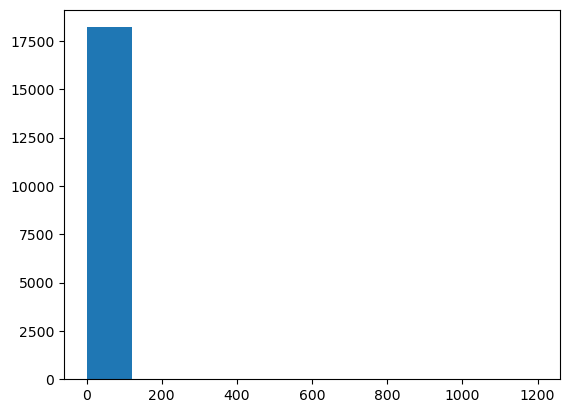

In [20]:
print(histograms_.shape)
plt.stairs(histograms_[:, 15], edges, fill = True)

In [60]:
print(len(intensities))
print(np.shape(intensities[2]))

10000
(18954,)


In [12]:
#labels_old = labels
labels = np.array(labels).squeeze()

In [61]:
pos = np.where(labels == 1)[0]
neg = np.where(labels == 0)[0]

ints = [np.array(i) for i in intensities]

pos_ints = np.concatenate([ints[i] for i in pos])
neg_ints = np.concatenate([ints[i] for i in neg])

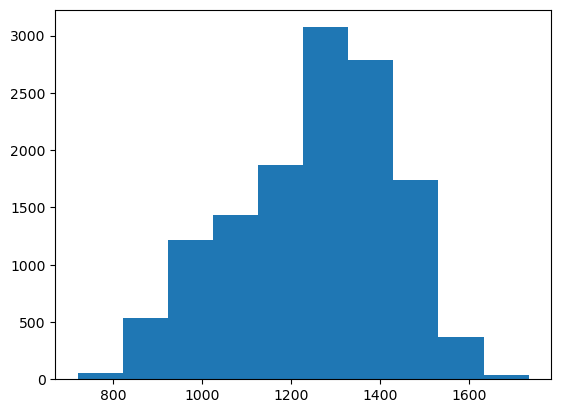

In [73]:
counts, edges = np.histogram(ints[5660])
plt.stairs(counts, edges, fill=True)

In [75]:
print(len(counts))
print(len(edges))

10
11


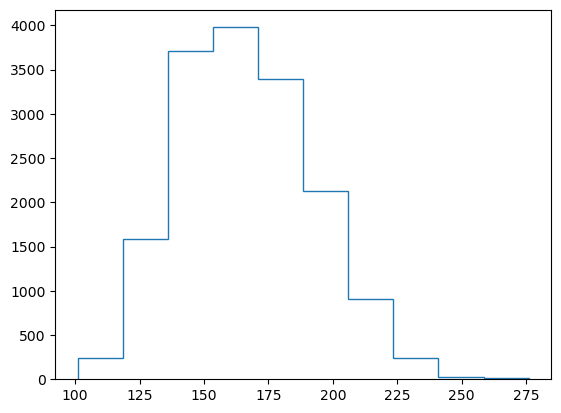

In [92]:
counts = np.zeros((10,2))
edges = np.zeros((11,2))
for i in range(0,2):
    counts[:,i], edges[:,i] = np.histogram(ints[i+239], bins=10)
    
plt.stairs(counts[:,1], edges[:,1])

In [77]:
counts, edges = [np.histogram(ints) if int.size > 0 else None for int in ints]

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (10000,) + inhomogeneous part.

(array([  4304., 318618., 309076.,  23137.,    419.,    851.,   3994.,
          5957.,   3512.,    561.]),
 array([   0. ,  118.8,  237.6,  356.4,  475.2,  594. ,  712.8,  831.6,
         950.4, 1069.2, 1188. ]),
 <BarContainer object of 10 artists>)

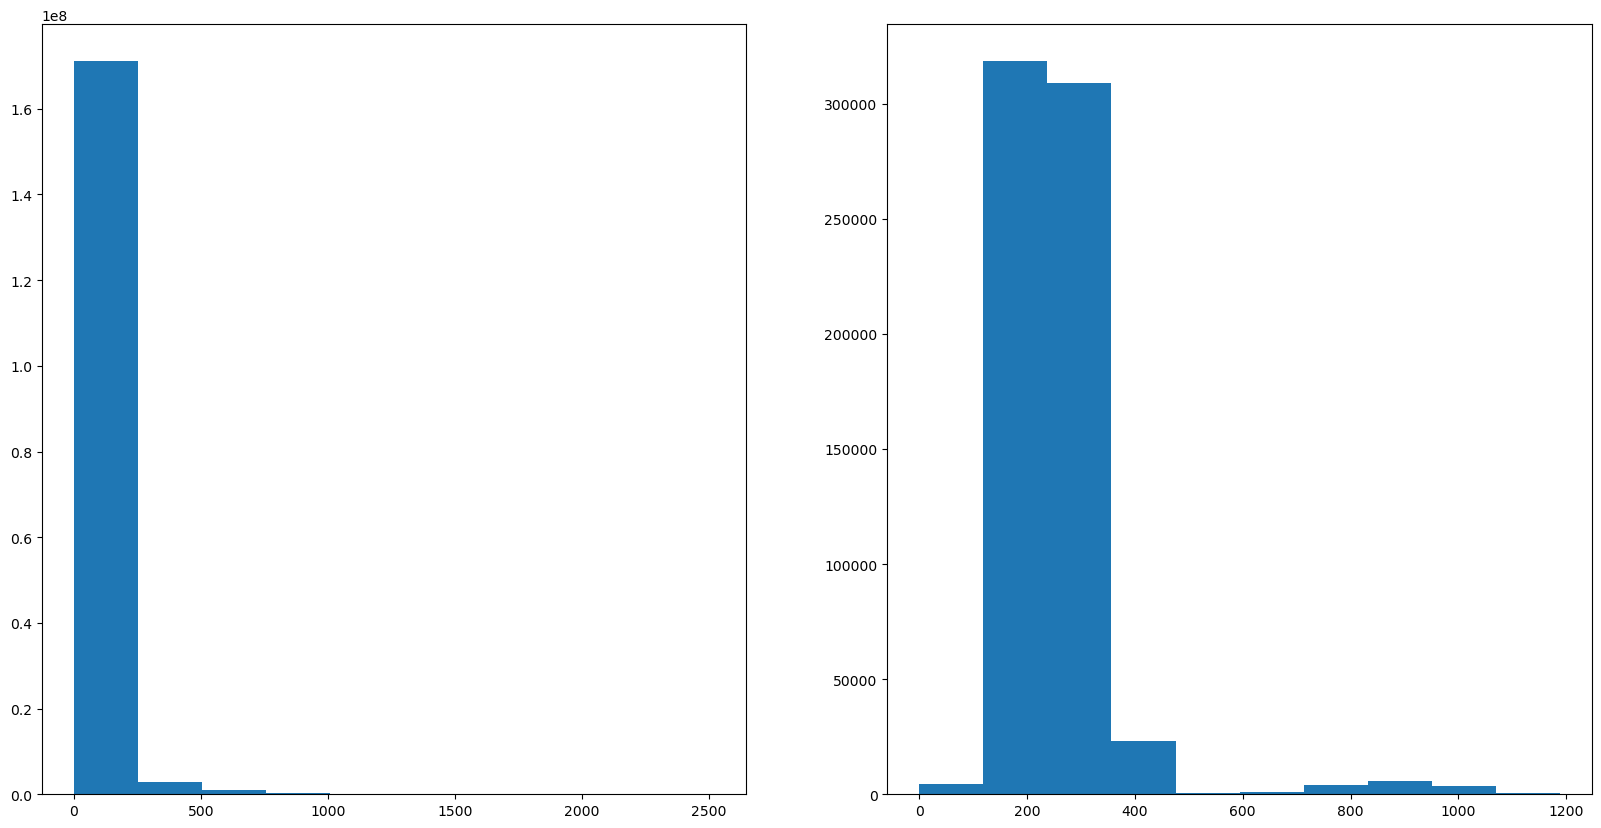

In [72]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.hist(neg_ints)
ax2.hist(pos_ints)

(array([8.31700e+03, 3.68097e+05, 2.59273e+05, 1.96720e+04, 1.97000e+02,
        1.10700e+03, 4.28000e+03, 5.88900e+03, 3.18300e+03, 4.12000e+02]),
 array([  10.,  129.,  248.,  367.,  486.,  605.,  724.,  843.,  962.,
        1081., 1200.]),
 <BarContainer object of 10 artists>)

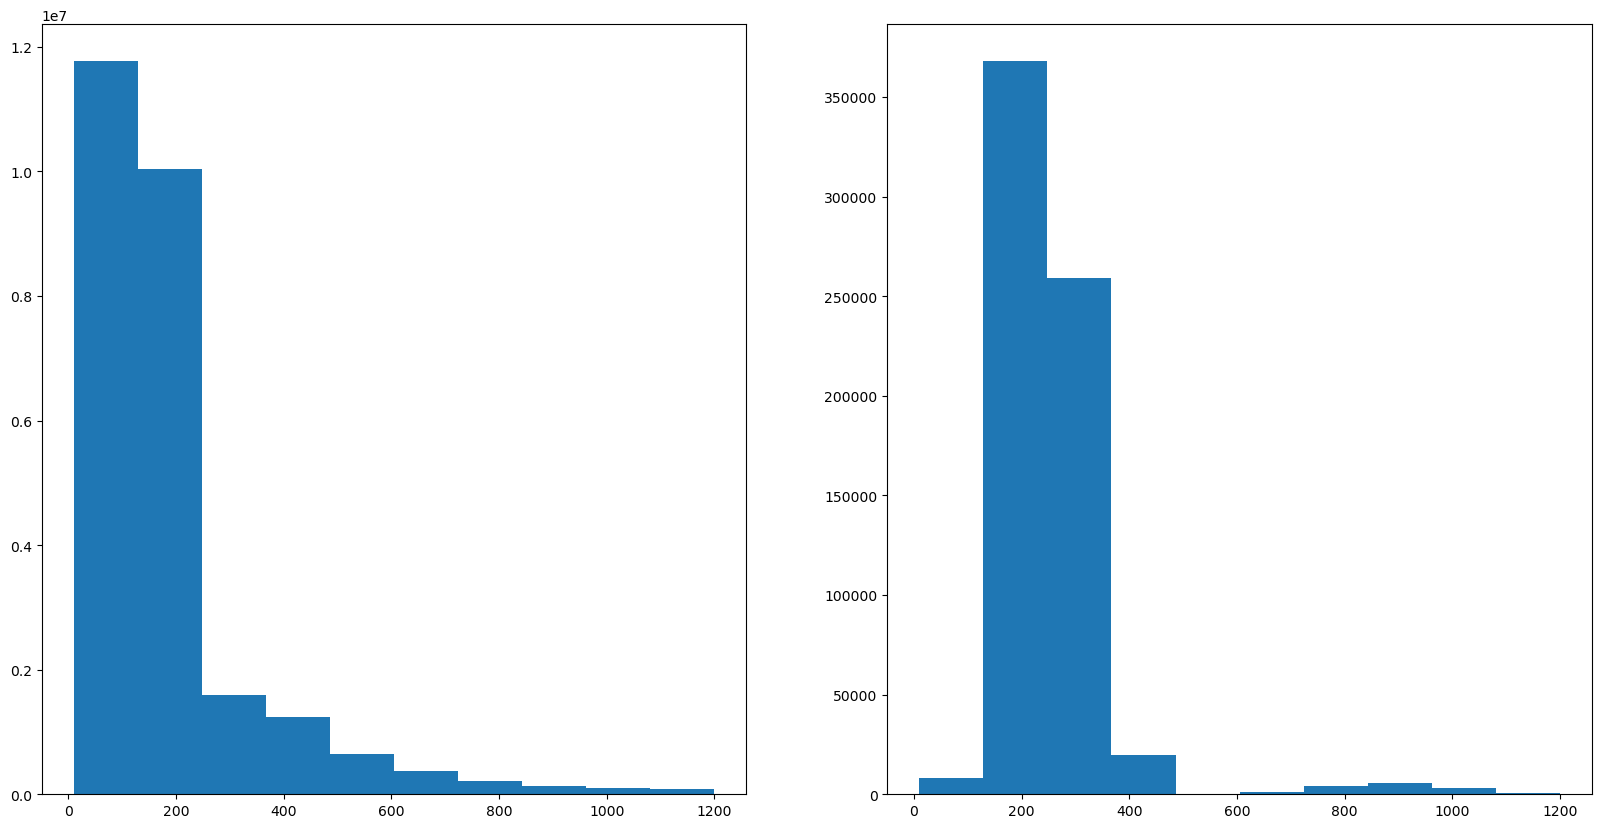

In [74]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.hist(neg_ints, range=(10., 1200.))
ax2.hist(pos_ints, range=(10., 1200.))

(array([4.30000e+01, 7.73300e+03, 9.84520e+04, 2.59331e+05, 2.20055e+05,
        4.90900e+04, 1.54420e+04, 5.13900e+03, 2.60000e+02, 8.00000e+00]),
 array([ 10.,  69., 128., 187., 246., 305., 364., 423., 482., 541., 600.]),
 <BarContainer object of 10 artists>)

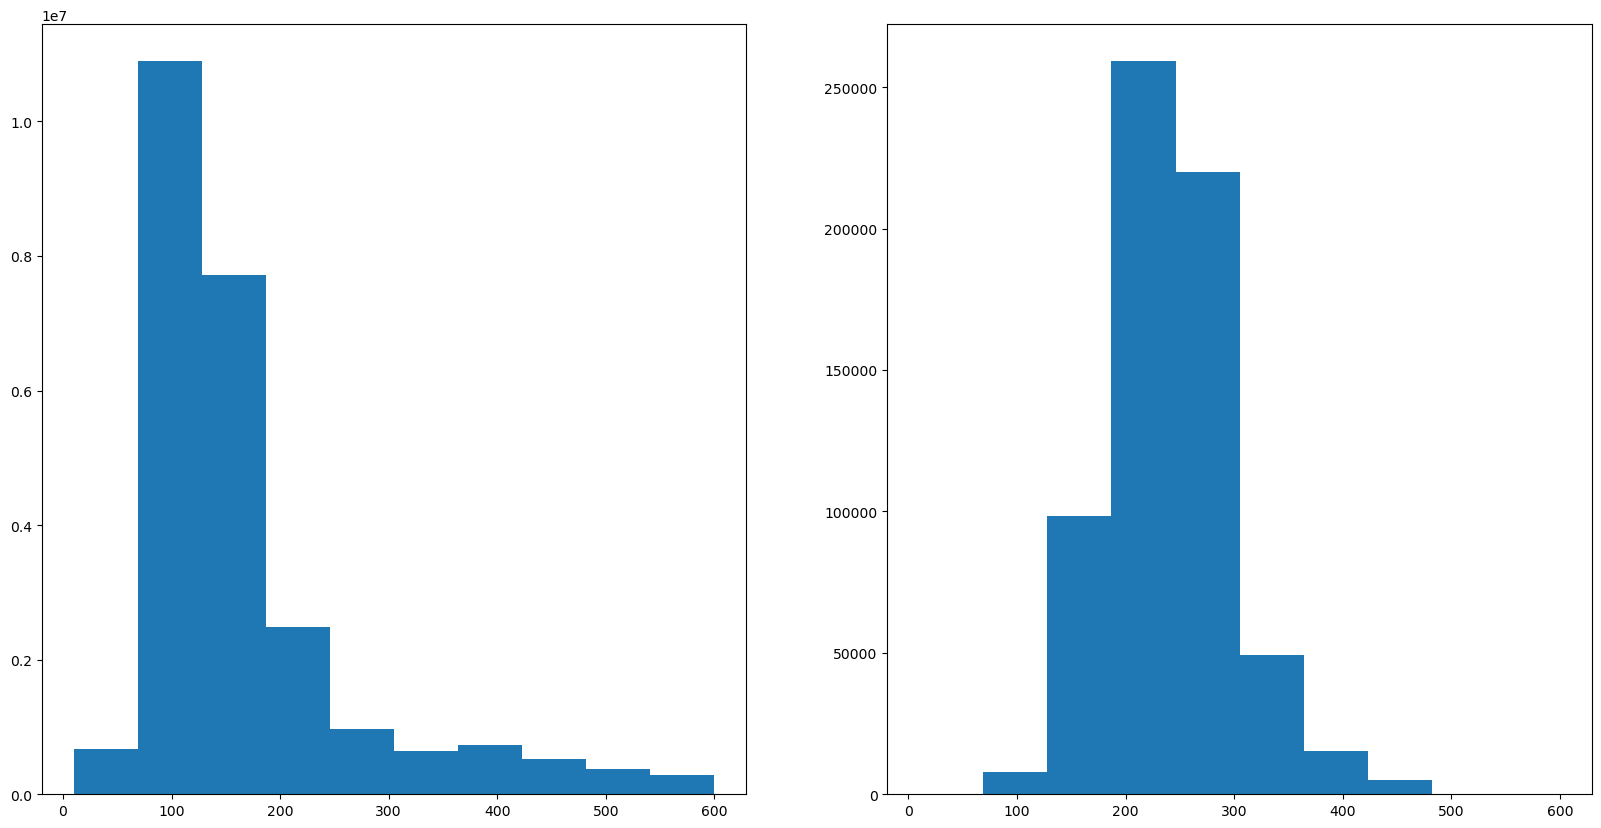

In [18]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.hist(neg_ints, range=(10., 600.))
ax2.hist(pos_ints, range=(10., 600.))

In [19]:

pos_means = np.array([means[i] for i in pos])
neg_means = np.array([means[i] for i in neg])
pos_stds = np.array([stds[i] for i in pos])
neg_stds = np.array([stds[i] for i in neg])

(array([15., 21.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([162.99825763, 234.90595102, 306.81364441, 378.72133779,
        450.62903118, 522.53672457, 594.44441796, 666.35211134,
        738.25980473, 810.16749812, 882.07519151]),
 <BarContainer object of 10 artists>)

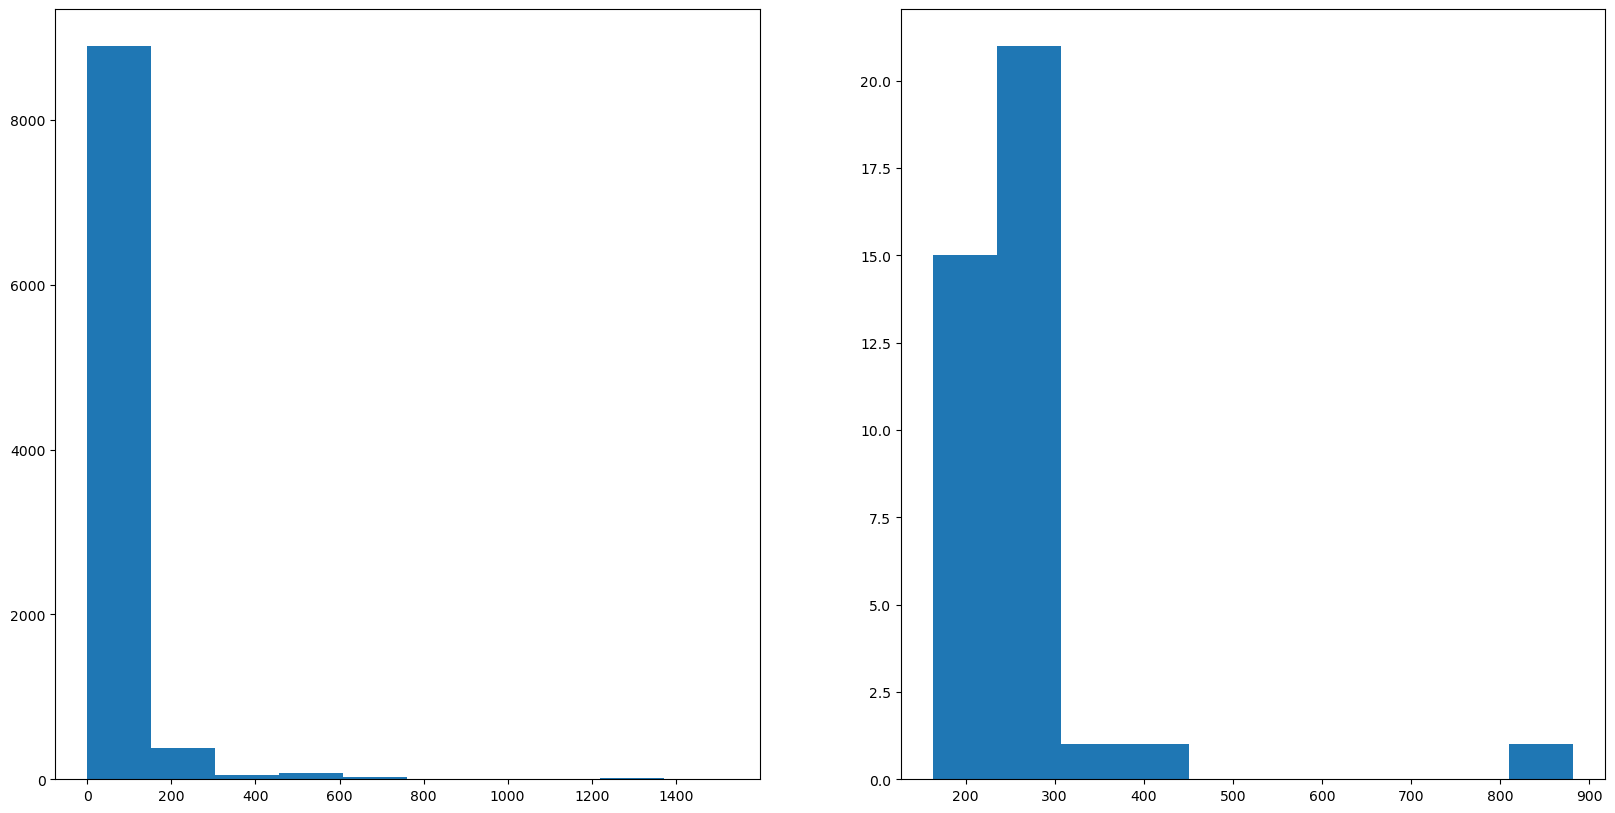

In [20]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.hist(neg_means)
ax2.hist(pos_means)

(array([ 0.,  0.,  6., 13., 16.,  2.,  1.,  0.,  0.,  0.]),
 array([ 10.,  69., 128., 187., 246., 305., 364., 423., 482., 541., 600.]),
 <BarContainer object of 10 artists>)

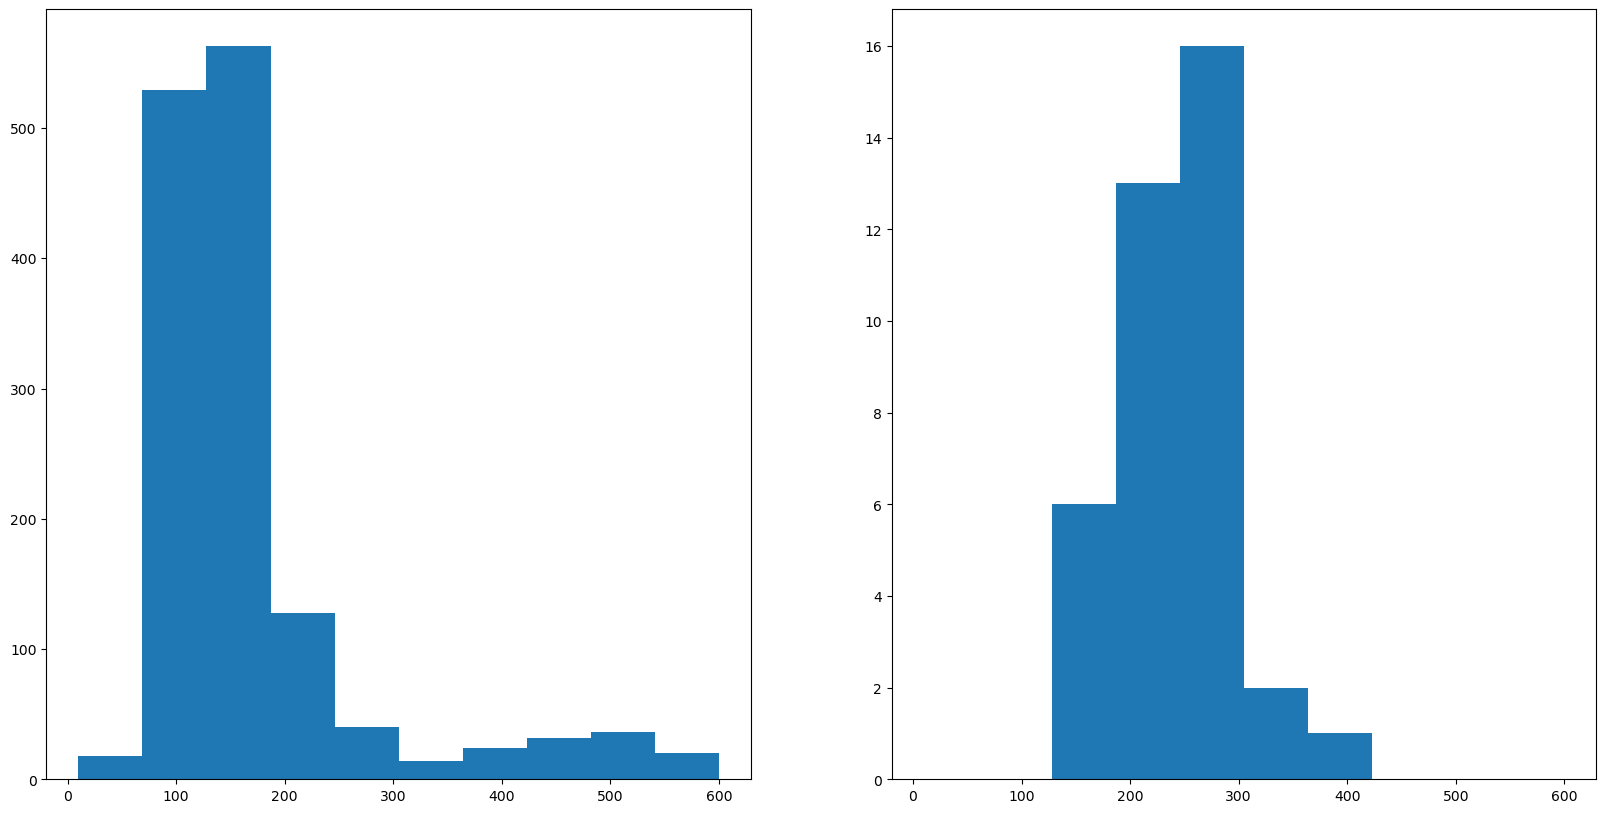

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.hist(neg_means, range=(10., 600.))
ax2.hist(pos_means, range=(10., 600.))

(array([17., 14.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 20.80111143,  29.34040433,  37.87969723,  46.41899014,
         54.95828304,  63.49757594,  72.03686884,  80.57616175,
         89.11545465,  97.65474755, 106.19404045]),
 <BarContainer object of 10 artists>)

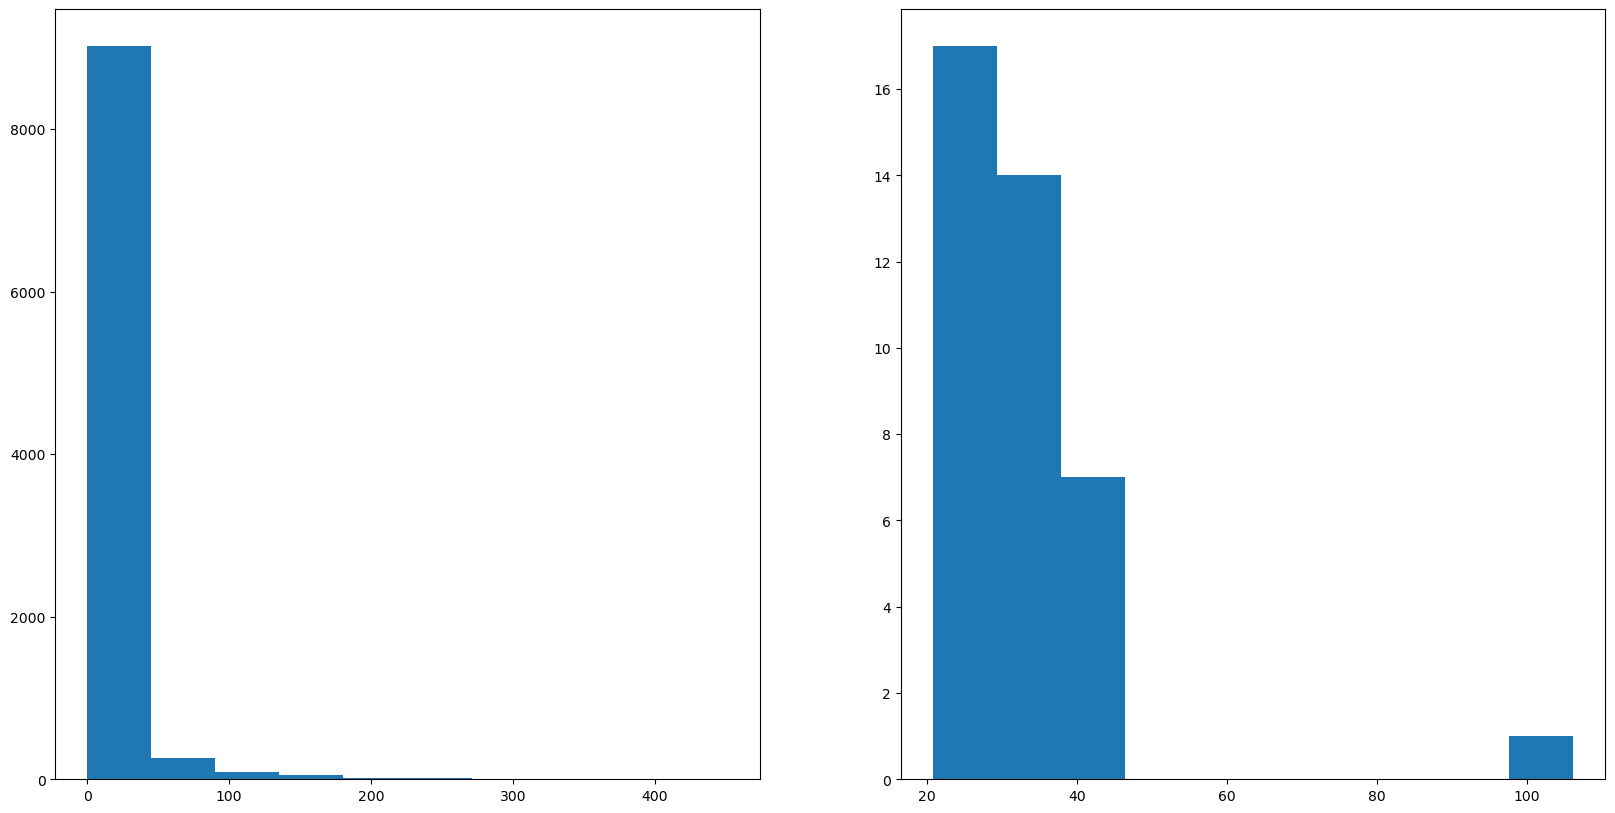

In [23]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.hist(neg_stds)
ax2.hist(pos_stds)

(array([33.,  5.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 10.,  39.,  68.,  97., 126., 155., 184., 213., 242., 271., 300.]),
 <BarContainer object of 10 artists>)

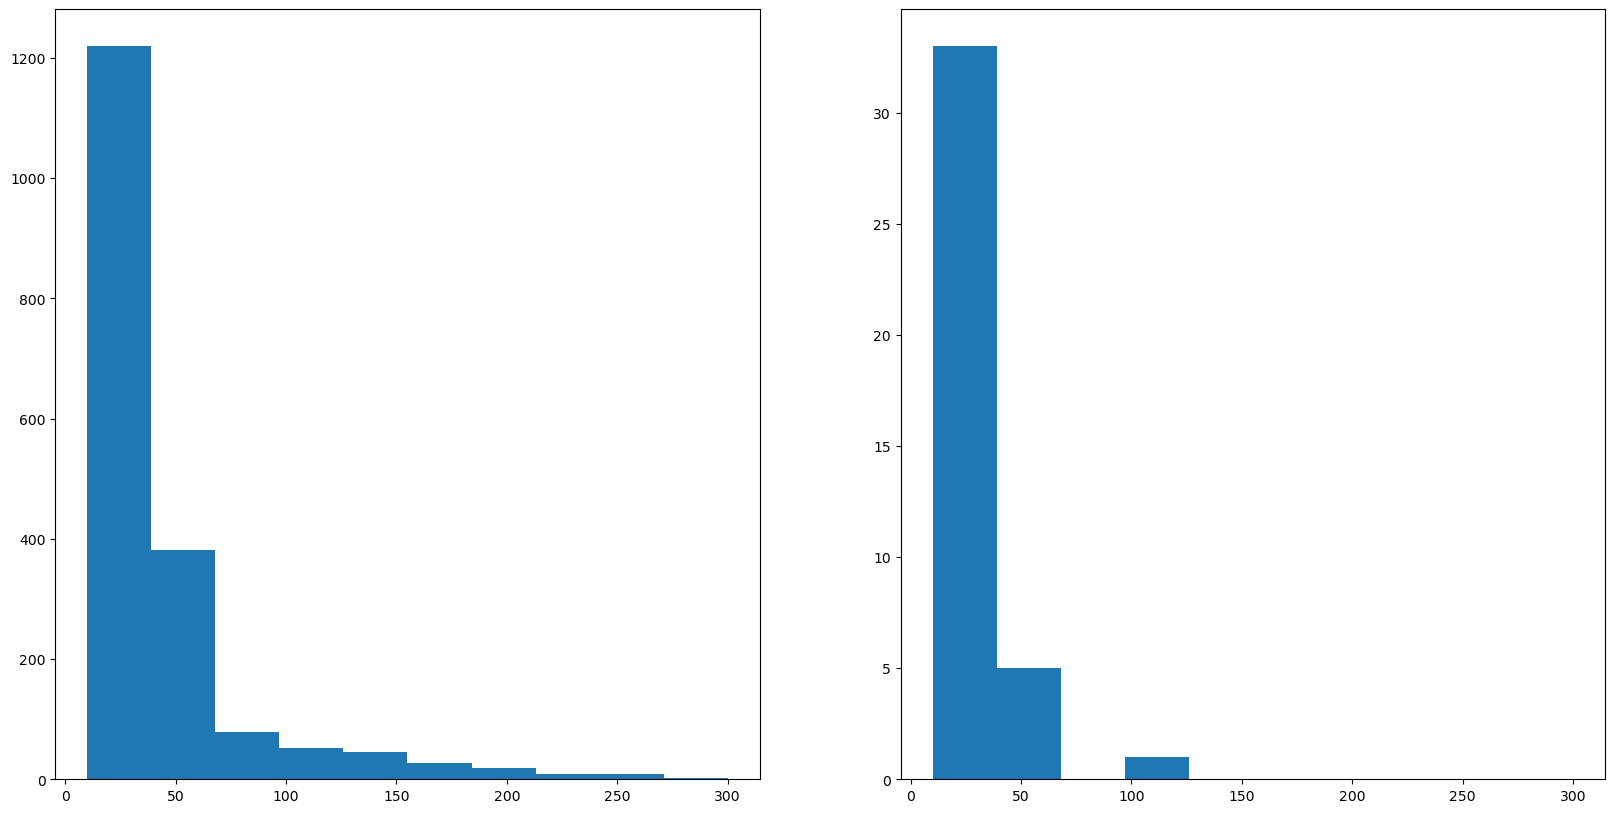

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.hist(neg_stds, range=(10., 300.))
ax2.hist(pos_stds, range=(10., 300.))

In [ ]:
with torch.no_grad():
    outputs = model(train_data.X).squeeze()
    outputs = torch.asnumpy(outputs)
    predictions = np.where(outputs < 0.5, 0, 1)
    total = train_data.y.shape[0]
    total = torch.asnumpy(total)
    correct = np.sum(predictions == train_data.y)
    pos = np.where(y == 1)[0]
    neg = np.where(y == 0)[0]
    correct_pos = np.sum(predictions[pos] == train_data.y[pos])
    correct_neg = np.sum(predictions[neg] == train_data.y[neg])

print(f"true labels: 1/all: {torch.sum(train_data.y == 1) / train_data.y.shape[0]}")
print(f"positive predictions: {torch.sum(predictions != 0)}")
print(f'Accuracy: {correct / total}')
print()
print(f'Found tumors (%): {correct_pos / len(pos)}')
print(f'Misslabeled non-tumors (%): {1. - (correct_neg / len(neg))}')
print(f"len(pos): {len(pos)}")
print(f"len(neg): {len(neg)}")